In [1]:
import tensorflow as tf
import numpy as np
import argparse
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from util import tile_images, restore_constants
from train import build
from read_dataset import read_dataset

In [3]:
constants = restore_constants('../../vae_models/changedetection/constants.json')
image_size = tuple(constants.IMAGE_SIZE[:-1])

In [4]:
reconstruct, generate_from_latent, train = build(constants)

In [5]:
sess = tf.Session()
sess.__enter__()

In [6]:
saver = tf.train.Saver()
saver.restore(sess, '../../vae_models/changedetection/model.ckpt')

INFO:tensorflow:Restoring parameters from ../../vae_models/changedetection/model.ckpt


In [7]:
get_next, _ = read_dataset('./data/cd.npy', image_size, int(1e4), constants.BATCH_SIZE, constants.EPOCH)

In [8]:
train_iterator = get_next()
batch_images = np.array([next(train_iterator)[0]], dtype=np.float32) / 255.0

In [9]:
reconst, latent = reconstruct(batch_images)
latent_range = np.linspace(-3.0, 3.0, num=20)
latent_in_page = int(constants.LATENT_SIZE / 1)

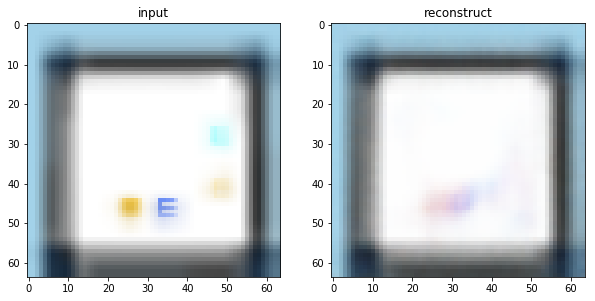

In [10]:
plt.figure(figsize=(10,10))
ax = plt.subplot(121)
ax.set_title('input')
plt.imshow(batch_images[0])
ax = plt.subplot(122)
ax.set_title('reconstruct')
plt.imshow(reconst[0])

In [11]:
for page in range(1):
    image_rows = []
    for i in range(latent_in_page):
        index = page * latent_in_page + i
        # change specific element of latent variable
        tiled_latent = np.tile(latent[0].copy(), (20, 1))
        tiled_latent[:,index] = latent_range

        # reconstruct from latent variable
        reconst = generate_from_latent(tiled_latent)

        # tiling reconstructed images
        reconst_images = np.array(reconst * 255, dtype=np.uint8)
        reconst_tiled_images = tile_images(reconst_images, row=1)
        image_rows.append(reconst_tiled_images)

    # show reconstructed images
    image_rows = tile_images(np.array(image_rows), row=latent_in_page)
    #cv2.imshow('test{}'.format(page), image_rows)

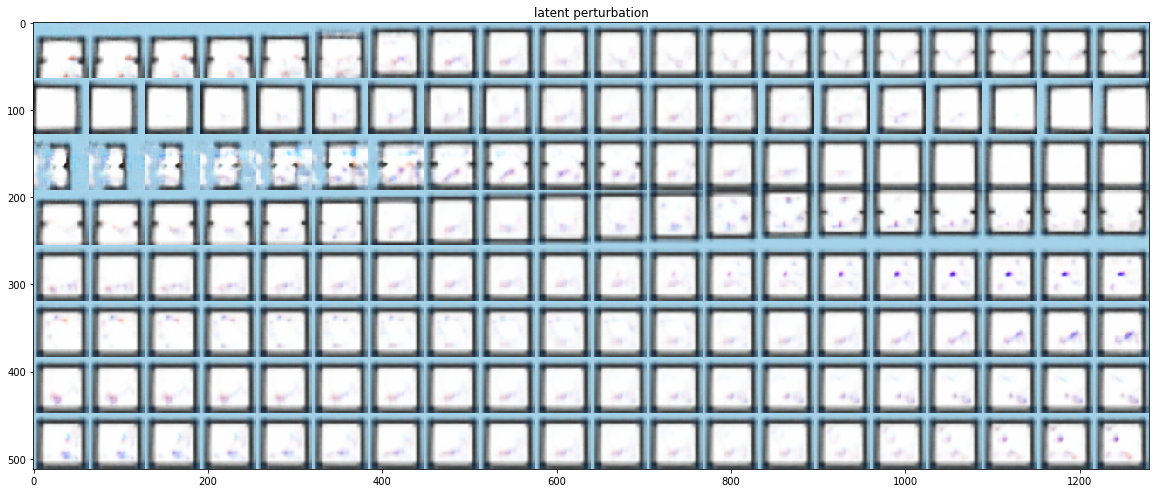

In [12]:
plt.figure(figsize=(20,10))
plt.title('latent perturbation')
plt.imshow(image_rows)